<a href="https://colab.research.google.com/github/siddhartthjain/1st-project/blob/master/denoising3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

In [11]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [12]:
len(X_train)

60000

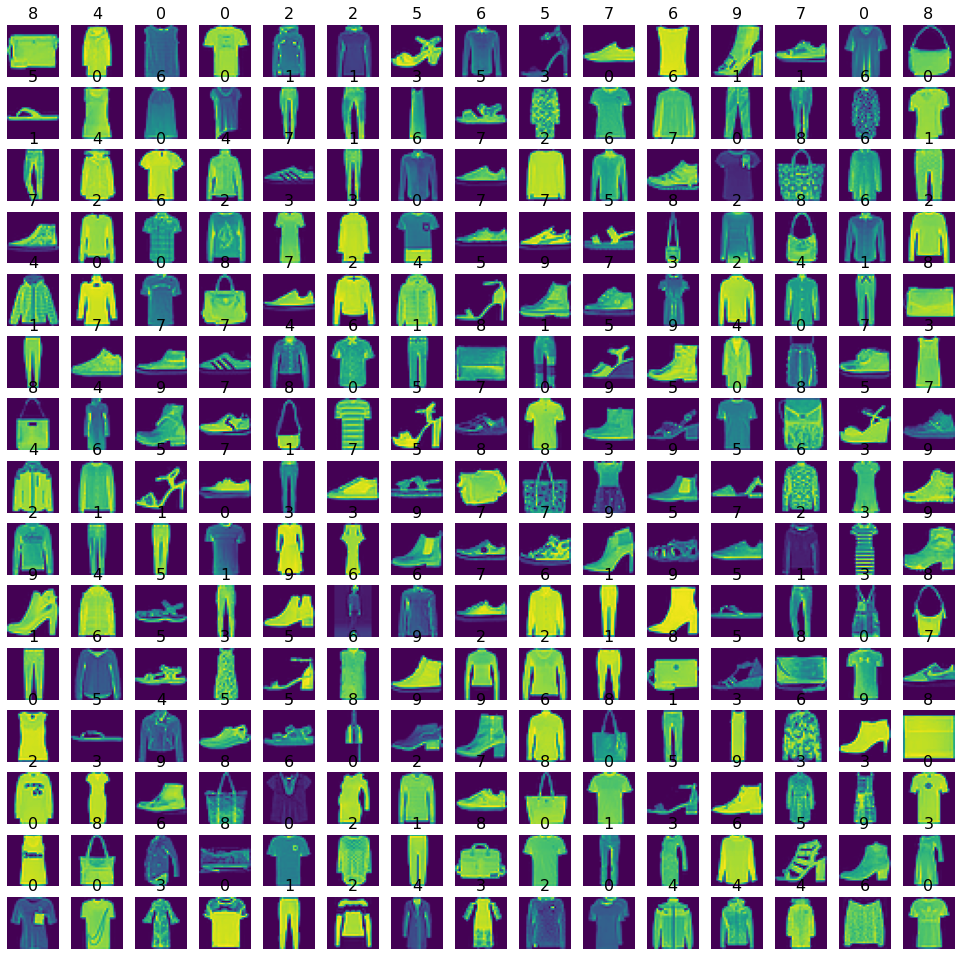

In [13]:
w_grid=15
l_grid=15
fig,axes=plt.subplots(w_grid,l_grid,figsize=(17,17))
axes=axes.ravel()
for i in range(0,w_grid*l_grid):
  index=np.random.randint(0,60000)
  axes[i].imshow(X_train[index])
  axes[i].set_axis_off()
  axes[i].set_title(y_train[index],fontsize=16)

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
noise_factor=0.3

noise_dataset=[]
for i in X_train:
  noisy_image=i+noise_factor*np.random.randn(*i.shape)
  noisy_image=np.clip(noisy_image,0,1)
  noise_dataset.append(noisy_image)


In [16]:
noise_dataset=np.array(noise_dataset)

In [17]:
noise_factor=0.3
noise_test_dataset=[]
for i in X_test:
  noisy_image=i+noise_factor*np.random.randn(*i.shape)
  noisy_image=np.clip(noisy_image,0,1)
  noise_test_dataset.append(noisy_image)

In [18]:
noise_test_dataset=np.array(noise_test_dataset)

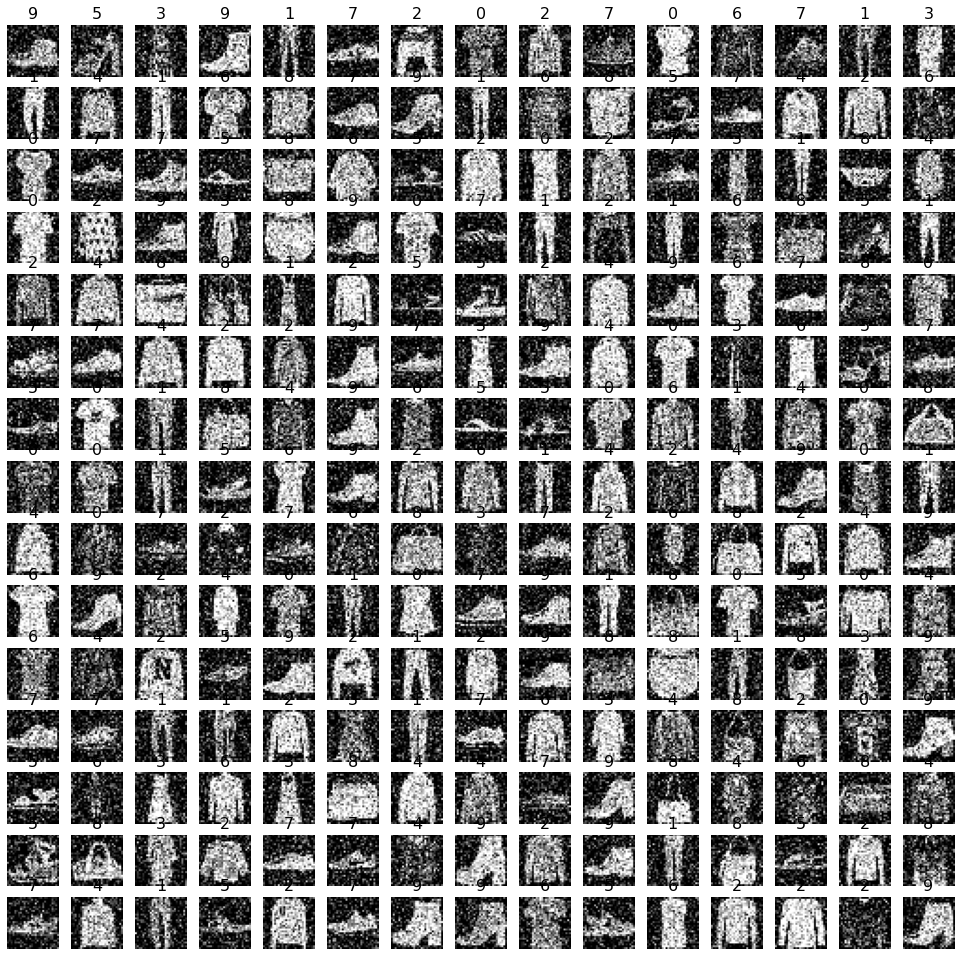

In [19]:
w_grid=15
l_grid=15
fig,axes=plt.subplots(w_grid,l_grid,figsize=(17,17))
axes=axes.ravel()
for i in range(0,w_grid*l_grid):
  index=np.random.randint(0,60000)
  axes[i].imshow(noise_dataset[index],cmap='gray')
  axes[i].set_axis_off()
  axes[i].set_title(y_train[index],fontsize=16)

In [20]:
autoencoder=tf.keras.models.Sequential([
                                        # tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                                        # tf.keras.layers.MaxPool2D(2,2),
                                        # tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                        # tf.keras.layers.MaxPool2D(2,2),
                                        # tf.keras.layers.UpSampling2D((2,2)),
                                        # tf.keras.layers.Conv2DTranspose(64,(3,3),activation='relu'),
                                        
                                        # tf.keras.layers.UpSampling2D((2,2)),
                                        # tf.keras.layers.Conv2DTranspose(1,(3,3),activation='relu'),
                                        # tf.keras.layers.UpSampling2D((1,1)),
                                        # tf.keras.layers.Conv2DTranspose(1,(3,3),activation='sigmoid')
                                        
                                        # tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
                                        # tf.keras.layers.Conv2DTranspose(32,kernel_size=(3,3),activation='relu'),
                                        # tf.keras.layers.Conv2DTranspose(64,kernel_size=(3,3),activation='relu'),
                                        # tf.keras.layers.Conv2DTranspose(1,kernel_size=(3,3),padding='same',activation='sigmoid')
                                         tf.keras.layers.Conv2D(16,kernel_size=(3,3),strides=2,padding='same',input_shape=(28,28,1)),
                                         tf.keras.layers.Conv2D(8,kernel_size=(3,3),strides=2,padding='same'),
                                         
                                         tf.keras.layers.Conv2D(8,kernel_size=(3,3),strides=1,padding='same'),
                                         
                                         tf.keras.layers.Conv2DTranspose(16,kernel_size=(3,3),strides=2,padding='same'),
                                         tf.keras.layers.Conv2DTranspose(1,kernel_size=(3,3),strides=2,padding='same',activation='sigmoid')
                                      


                                        
])

In [38]:
autoencoder.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(),metrics=['acc','mse'])


In [39]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [40]:
autoencoder.fit(noise_dataset.reshape(-1,28,28,1),X_train.reshape(-1,28,28,1),
                epochs=10,
                batch_size=200,
                validation_data=(noise_test_dataset.reshape(-1,28,28,1),
                X_test.reshape(-1,28,28,1)))

Epoch 1/10
300/300 [==============================] - 14s 47ms/step - loss: 0.3015 - acc: 0.5092 - mse: 0.0160 - val_loss: 0.3036 - val_acc: 0.5069 - val_mse: 0.0160
Epoch 2/10
300/300 [==============================] - 14s 46ms/step - loss: 0.3011 - acc: 0.5092 - mse: 0.0159 - val_loss: 0.3032 - val_acc: 0.5070 - val_mse: 0.0163
Epoch 3/10
300/300 [==============================] - 14s 46ms/step - loss: 0.3009 - acc: 0.5092 - mse: 0.0158 - val_loss: 0.3028 - val_acc: 0.5070 - val_mse: 0.0160
Epoch 4/10
300/300 [==============================] - 14s 46ms/step - loss: 0.3007 - acc: 0.5092 - mse: 0.0157 - val_loss: 0.3027 - val_acc: 0.5070 - val_mse: 0.0157
Epoch 5/10
300/300 [==============================] - 14s 46ms/step - loss: 0.3005 - acc: 0.5092 - mse: 0.0156 - val_loss: 0.3024 - val_acc: 0.5070 - val_mse: 0.0157
Epoch 6/10
300/300 [==============================] - 14s 47ms/step - loss: 0.3003 - acc: 0.5093 - mse: 0.0156 - val_loss: 0.3025 - val_acc: 0.5070 - val_mse: 0.0161
Epoc

In [41]:
evaluation=autoencoder.evaluate(noise_test_dataset.reshape(-1,28,28,1),X_test.reshape(-1,28,28,1))
format(evaluation)

313/313 [==============================] - 1s 4ms/step - loss: 0.3019 - acc: 0.5071 - mse: 0.0153


'[0.30189377069473267, 0.5070722103118896, 0.015322059392929077]'

In [42]:
predicted=autoencoder.predict(noise_test_dataset[:10].reshape(-1,28,28,1))

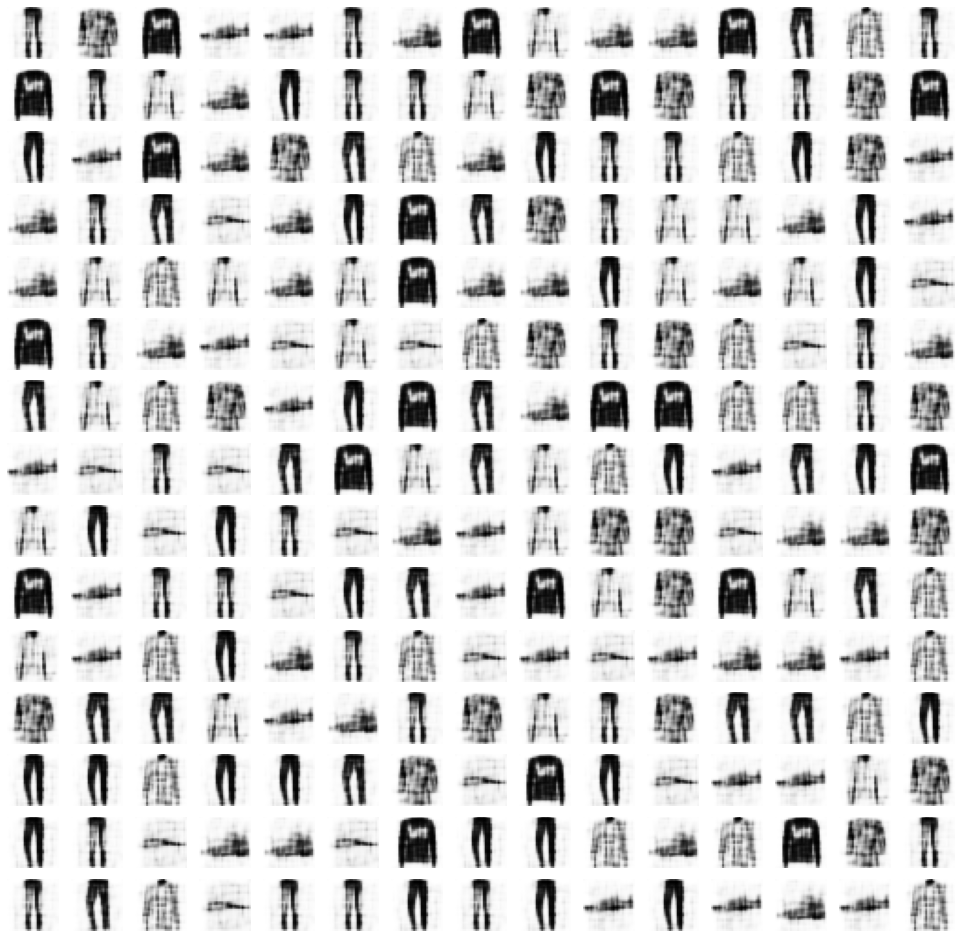

In [43]:
w_grid=15
l_grid=15
fig,axes=plt.subplots(w_grid,l_grid,figsize=(17,17))
axes=axes.ravel()
for i in range(0,w_grid*l_grid):
  index=np.random.randint(0,10)
  axes[i].imshow(predicted[index].reshape(28,28),cmap='gray_r')
  axes[i].set_axis_off()

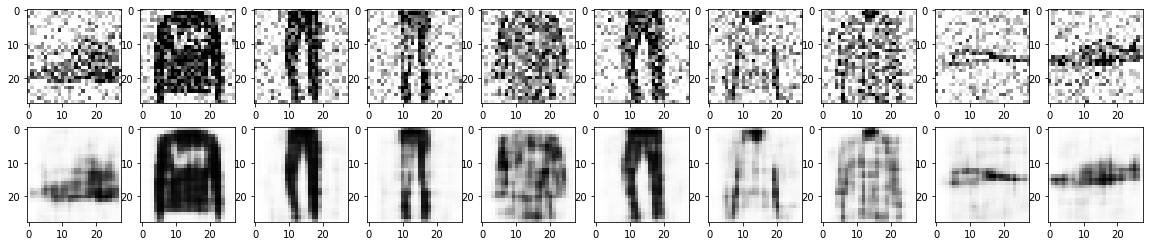

In [44]:
fig,axes=plt.subplots(2,10,figsize=(20,4))
for images,row in zip([noise_test_dataset[:10],predicted],axes):
  for img,ax in zip(images,row):
    ax.imshow(img.reshape(28,28),cmap='gray_r')
    